In [1]:
#Access database 

import sqlite3
import numpy as np
import pandas as pd 
import sweetviz as sv
from summarytools import dfSummary
import seaborn as sns
import matplotlib.pyplot as plt

db = sqlite3.connect("../data/bmarket.db")
cursor = db.cursor()
cursor.execute('SELECT name FROM PRAGMA_TABLE_INFO("bank_marketing");')
colums_name = cursor.fetchall()

# Print all Unique of each column
for col in colums_name[1:]:
    cursor.execute('SELECT DISTINCT "{col}" FROM bank_marketing;'.format(col=col[0]))
    print(col[0],cursor.fetchall())



c:\Users\Wei Yang\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Age [('57 years',), ('55 years',), ('33 years',), ('36 years',), ('27 years',), ('58 years',), ('48 years',), ('150 years',), ('24 years',), ('34 years',), ('42 years',), ('43 years',), ('26 years',), ('37 years',), ('46 years',), ('59 years',), ('49 years',), ('30 years',), ('51 years',), ('45 years',), ('31 years',), ('41 years',), ('38 years',), ('47 years',), ('69 years',), ('50 years',), ('25 years',), ('39 years',), ('44 years',), ('52 years',), ('35 years',), ('77 years',), ('40 years',), ('56 years',), ('53 years',), ('60 years',), ('29 years',), ('28 years',), ('54 years',), ('32 years',), ('81 years',), ('63 years',), ('21 years',), ('22 years',), ('74 years',), ('80 years',), ('62 years',), ('68 years',), ('86 years',), ('23 years',), ('71 years',), ('67 years',), ('65 years',), ('20 years',), ('19 years',), ('66 years',), ('75 years',), ('18 years',), ('72 years',), ('70 years',), ('82 years',), ('85 years',), ('61 years',), ('88 years',), ('83 years',), ('78 years',), ('64

In [2]:
#DB row to Np Array

cursor.execute('SELECT * FROM bank_marketing;')
rows = cursor.fetchall()
numpy_array = np.array(rows)


#Data cleaning
value_replacements = {'Cell':'cellular','Telephone':'telephone',None: "unknown",999:0}
for row in numpy_array:
    if row[9]< 0:
        row[9] = -row[9]
    row[1] = int(row[1][0:2])
    for old,new in value_replacements.items():
        row[row == old] = new

# Display cleaned data
dataframe = pd.DataFrame.from_records(numpy_array,columns = ("ID","Age","Occupation","Marital Status","Education Level","Credit Default","Housing Loan","Personal Loan","Contact Method","Campaign Calls","Previous Contact Days","Subscription Status")) # np.array to pd.DataFrame
dfSummary(dataframe)




No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,ID[int64],Mean (sd) : 20594.5 (11890.1)min < med < max:0.0 < 20594.5 < 41188.0IQR (CV) : 20593.5 (1.7),"41,188 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAHoAAAAyCAYAAACTUs/lAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMywgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/GU6VOAAAACXBIWXMAAAsTAAALEwEAmpwYAAAA30lEQVR4nO3UMQoCMRBAURXLqbOFjRfxEJ5gzpYTeArvsY2FqdOvrQgLaVbB/1+ZDGHgQ/bLsuz0/w6/XkDfcVy7KKVcI2IaeaT3fo6I2dnx2Y33eLbWbu9nq6EjYsrMx8jDtdZLZt6dHZ/deI/T55lfN4ShIQwNYWgIQ0MYGsLQEIaGMDSEoSEMDWFoCENDGBrC0BCGhjA0hKEhDA1haAhDQxgawtAQhoYwNIShIQwNYWgIQ0MYGsLQEIaGMDSEoSEMDWFoCENDGBrC0BCGhjA0hKEhDA1haAhDQxga4gWhg1ey46OS8wAAAABJRU5ErkJggg=="">",0(0.0%)
2,Age[int64],Mean (sd) : 37.5 (12.5)min < med < max:15.0 < 36.0 < 98.0IQR (CV) : 16.0 (3.0),77 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAHoAAAAyCAYAAACTUs/lAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMywgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/GU6VOAAAACXBIWXMAAAsTAAALEwEAmpwYAAABMElEQVR4nO3asWnDQBhAYTkY1FxauUhjtICzQIbwBGqzlibwSmlSRLUagUCewOIOzhdz7321sAQP/1j3+7BtW6P6vf33A6iMY+kbdl13DSGcYq6d5/lvmqbbs5+JoHjoEMJpGIbfmGvHcfx49vNQOLohDA1haAhDQxgawtAQhoYwNIShIQwNYWiI4mfdKZZl+ez7/jvmWhcg+146dNu27y5A8nB0QxgaIsvoTvkzwbqul6Zposax8skSOvHPBF857qk0jm4IQ0MYGsLQEIaGMDSEoSFe+qw7hQuQfdWEdgGyz9EN8fAb7fl1XR6G9vy6Lo5uCENDGBrC0BCGhjA0hKEhDA1haIhqlhopiJsuZGjipsvRDWFoCENDGBrC0BDIX90pEl/FziGEn9jPLvnqdgcC7V7uJymEMwAAAABJRU5ErkJggg=="">",0(0.0%)
3,Occupation[object],1. admin.2. blue-collar3. technician4. services5. management6. retired7. entrepreneur8. self-employed9. housemaid10. unemployed11. other,"10,422 (25.3%)9,254 (22.5%)6,743 (16.4%)3,969 (9.6%)2,924 (7.1%)1,720 (4.2%)1,456 (3.5%)1,421 (3.5%)1,060 (2.6%)1,014 (2.5%)1,205 (2.9%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAG8AAACzCAYAAACHOUI0AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMywgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/GU6VOAAAACXBIWXMAAAsTAAALEwEAmpwYAAACP0lEQVR4nO3aMWoCURhG0RhSTisWriorcG2uIKtKEevpJ7UoiEFf5so5Gxjhwle8382yLG80vf/3D+DvxAsTL0y8MPHCxAsTL2yz3W4/p2najfrgPM8/p9Ppa9T3XtnHNE27w+HwPeqDx+NxP+pbr85shokXJl6YeGHihYkXJl6YeGHihYkX5m0zbOMPSF1mM2zIbJrK5xhyEnIGeg6zGSZemHhh4oWJFyZemHhh4oWJFyZemLfNMCehMLMZ9rDZNI3jPewk5OwzntkMEy9MvDDxwsQLEy9MvDDxwsQLEy/M22aYk1CY2Qy7azZN47rcdRJy9lkXsxkmXph4YeKFiRcmXph4YeKFiRcmXpi3zTAnoTCzGXZzNk3let08CTkDrZfZDBMvTLww8cLECxMvTLww8cLECxMvzNtmmJNQmNkMuzqbprLh6knIGajBbIaJFyZemHhh4oWJFyZemHhh4oWJF+ZtM8xJKMxshl3MpsnsuDgJOQd1mM0w8cLECxMvTLww8cLECxMvTLww8cK8bYY5CYWZzTCzGeYkFGY2w8QLEy9MvDDxwsQLEy9MvDDxwsQLEy/Mw3SYe16Y2Qw7m02T2XJ2z3PLazGbYeKFiRcmXph4YeKFiRcmXph4YeKFedsMcxIKM5thZjPMSSjMbIaJFyZemHhh4oWJFyZemHhh4oWJF+ZtM8xJKMxshpnNMCehMLMZJl6YeGHihYkXJl6YeGHihYkXJl6Yt80wJ6EwsxkmXph4YeKFiRcmXtgvBmQDjWD/gUsAAAAASUVORK5CYII="">",0(0.0%)
4,Marital Status[object],1. married2. single3. divorced4. unknown,"24,928 (60.5%)11,568 (28.1%)4,612 (11.2%)80 (0.2%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAG8AAABBCAYAAADfY/omAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMywgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/GU6VOAAAACXBIWXMAAAsTAAALEwEAmpwYAAABG0lEQVR4nO3ZoQ3DQAxAUd+p8GhUUN7O0wkyWyboPuUFDQ5PeVFyxPel/yaw9CUDu+z7HmKq2QOon/HAyjRNz9baNXuQUWzb9l3X9ZU9xxGX1tp1nudP9iCjWJbllj3DUa5NMOOBGQ/MeGDGAzMemPHAjAdmPDDjgXnb/EO6bRb/eVyuTbDUtUlaUSNKfQmR3i8jcm2CGQ/MeGDGAzMemPHAjAdmPDDjgRkPzHhgHqbB/OeBuTbBTq9NV904Tv/z/MGNw7UJZjww44EZD8x4YMYDMx6Y8cCMB2Y8MG+bYL6EwFybYMYDq6WUR/YQ6lMj4p49hPq4NsGMB2Y8MOOBGQ/MeGDGAzMemPHAjAdWI+KdPYT6+M8Dc22C/QDQH00475i73wAAAABJRU5ErkJggg=="">",0(0.0%)
5,Education Level[object],1. university.degree2. high.school3. basic.9y4. professional.course5. basic.4y6. basic.6y7. unknown8. illiterate,"12,168 (29.5%)9,515 (23.1%)6,045 (14.7%)5,243 (12.7%)4,176 (10.1%)2,292 (5.6%)1,731 (4.2%)18 (0.0%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAG8AAACCCAYAAABIH5Y8AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMywgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/GU6VOAAAACXBIWXMAAAsTAAALEwEAmpw

Age                                    0.027175
Credit Default                        -0.003689
Housing Loan                           0.007639
Personal Loan                         -0.004958
Campaign Calls                        -0.066357
Previous Contact Days                  0.267088
Subscription Status                    1.000000
Occupation_admin.                      0.031426
Occupation_blue-collar                -0.074423
Occupation_entrepreneur               -0.016644
Occupation_housemaid                  -0.006505
Occupation_management                 -0.000419
Occupation_retired                     0.092221
Occupation_self-employed              -0.004663
Occupation_services                   -0.032301
Occupation_student                     0.093955
Occupation_technician                 -0.006149
Occupation_unemployed                  0.014752
Marital Status_divorced               -0.010608
Marital Status_married                -0.043398
Marital Status_single                  0

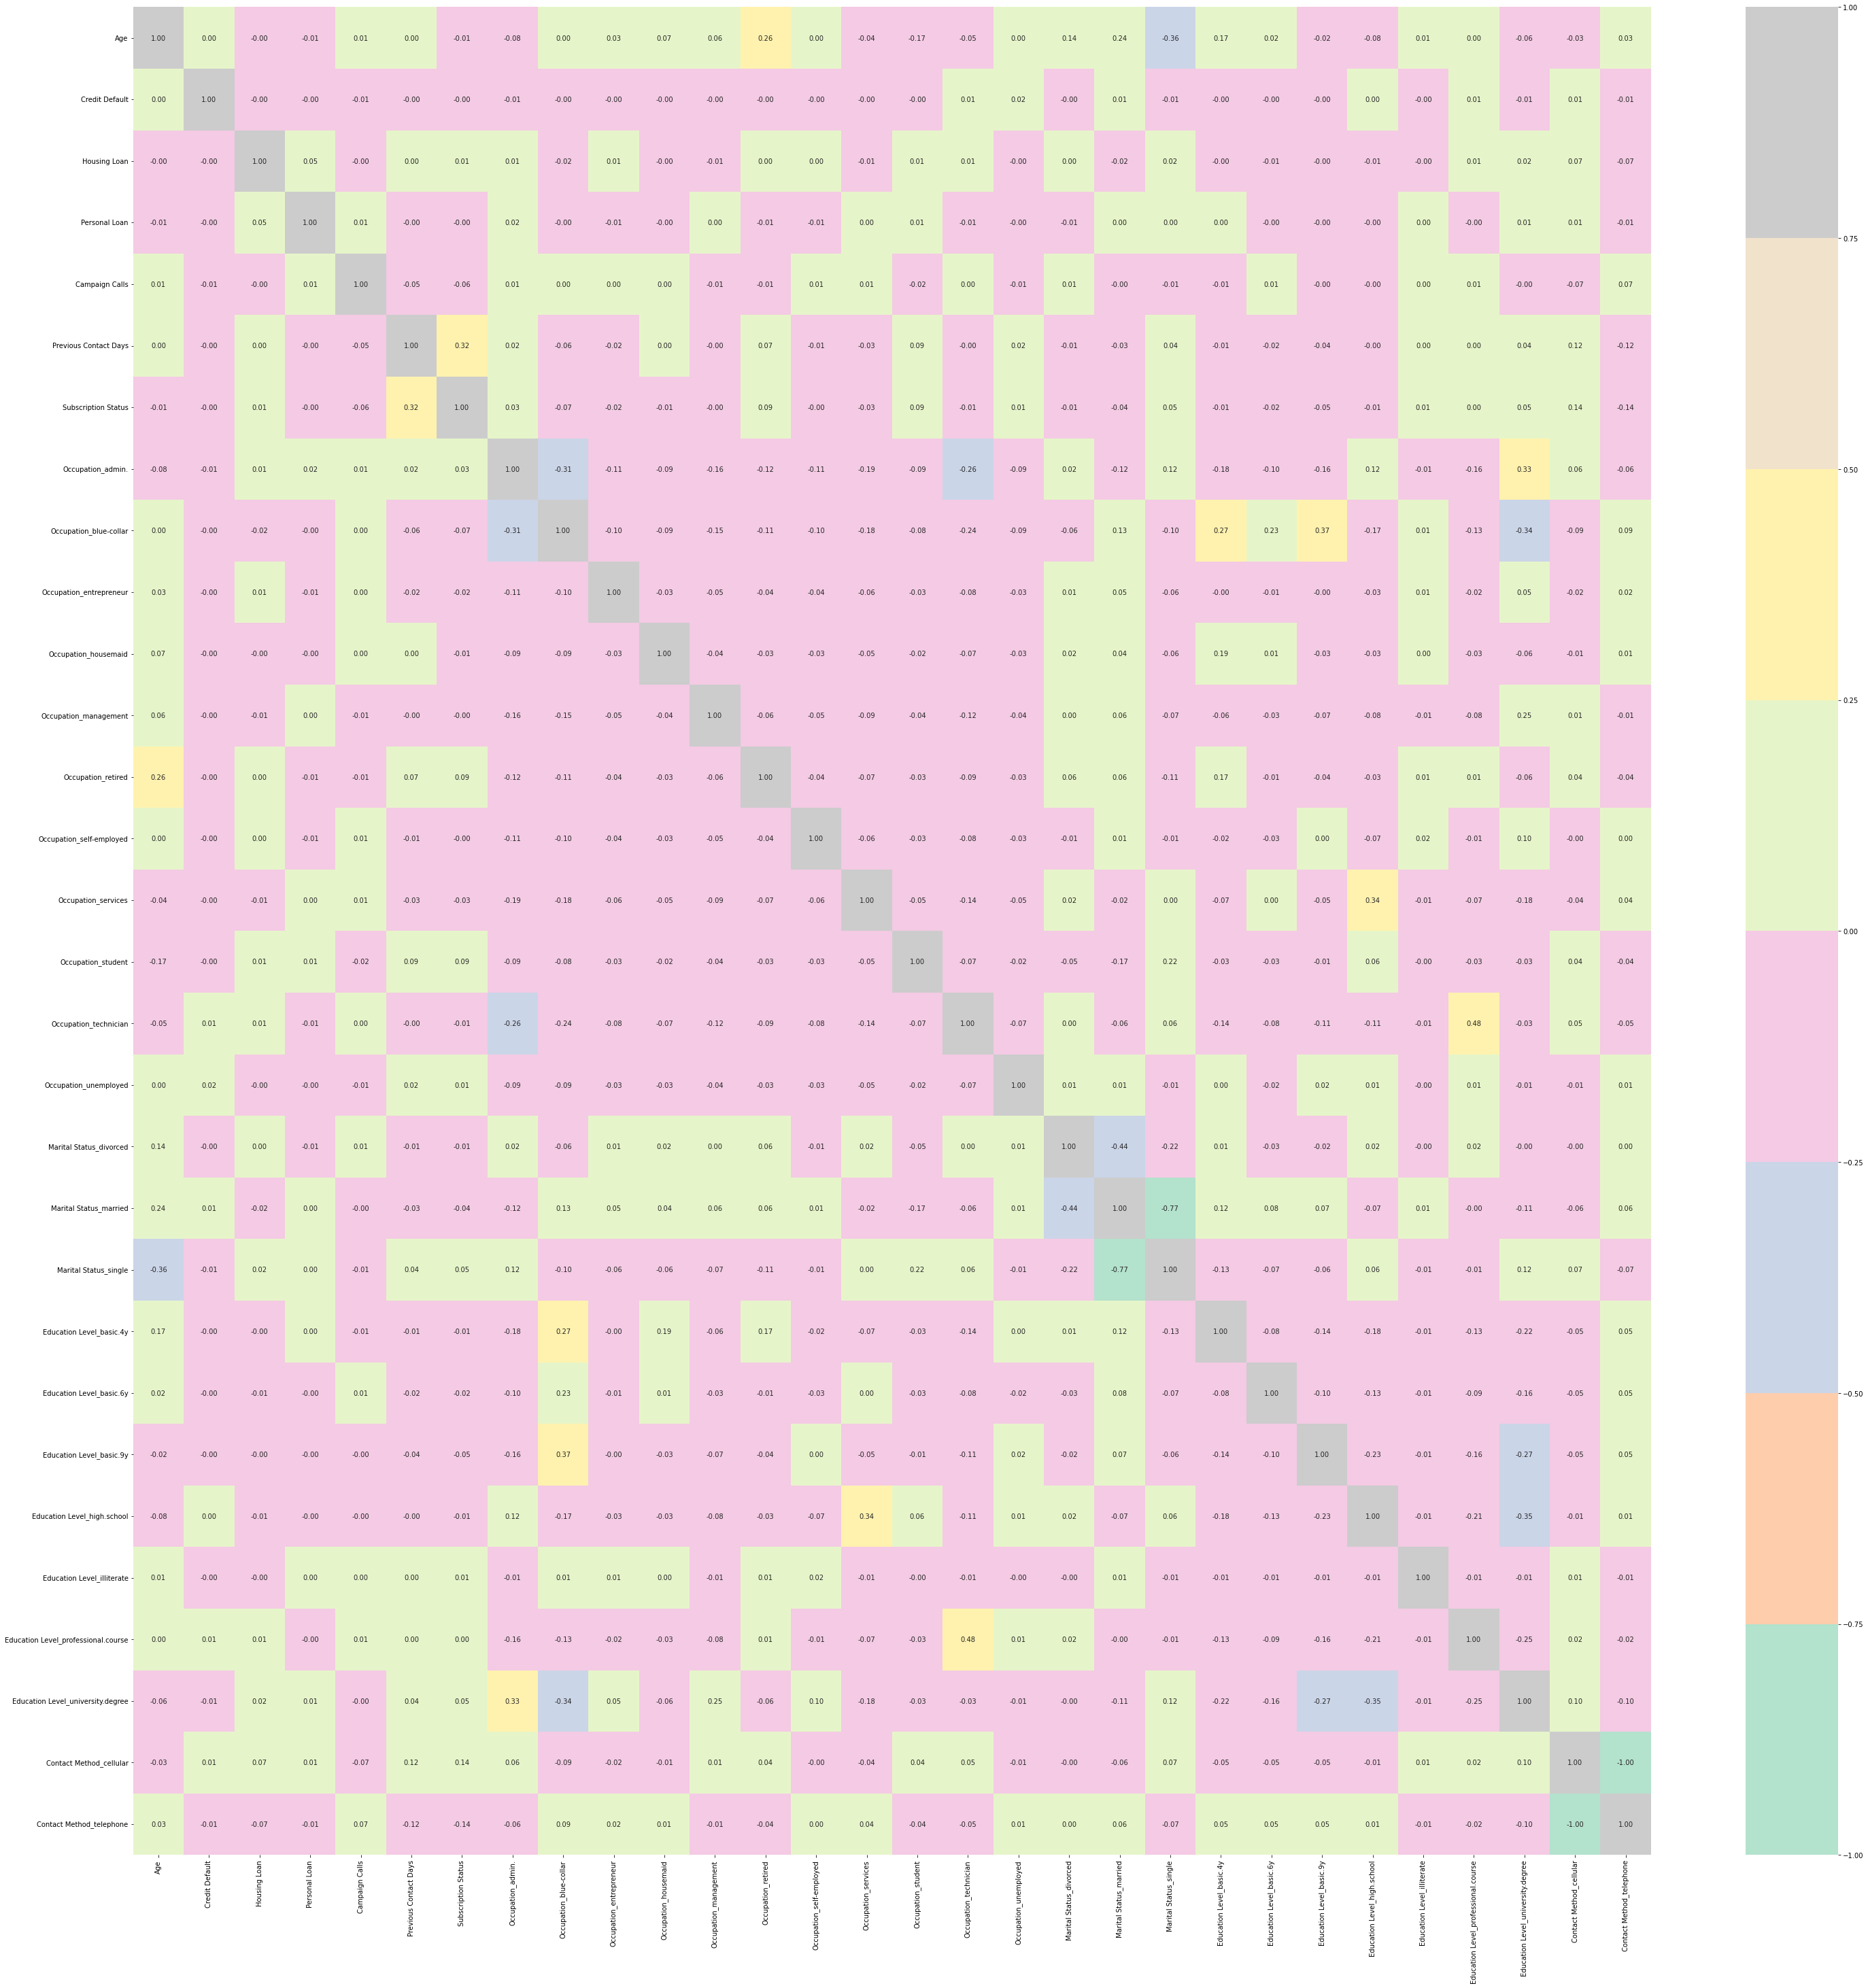

In [ ]:
value_replacements = {"unknown": None,"yes":1,"no":0}
for row in numpy_array:
    for old,new in value_replacements.items():
        row[row == old] = new

dataframe2 = pd.DataFrame.from_records(numpy_array,columns = ("ID","Age","Occupation","Marital Status","Education Level","Credit Default","Housing Loan","Personal Loan","Contact Method","Campaign Calls","Previous Contact Days","Subscription Status")) # np.array to pd.DataFrame
dataframe2 = dataframe2.drop("ID",axis=1  )
#Hot one encoder for Catagorical data
test = pd.get_dummies(dataframe2) 
plt.figure(figsize=(50,50))
sns.heatmap(test.corr(method= "spearman"), annot=True, fmt='.2f', cmap='Pastel2')
print(test.corr()["Subscription Status"])



C:\Users\Wei Yang\AppData\Local\Temp\ipykernel_25476\2227173420.py:33: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


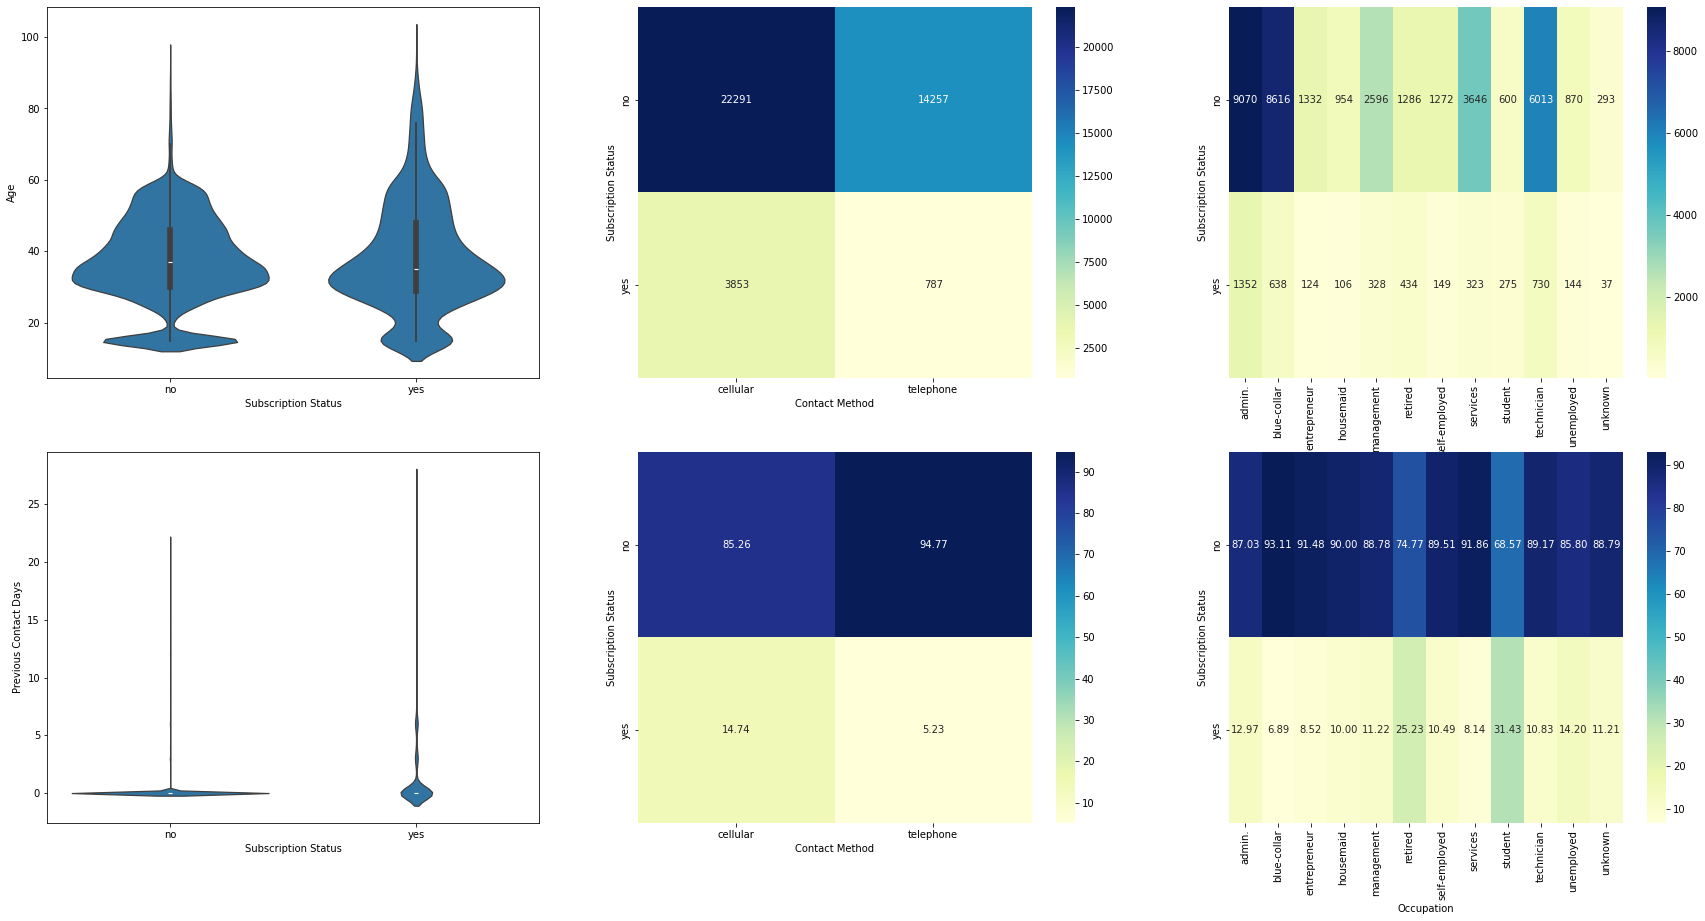

In [4]:
#2D Comparison  


fig, ax =plt.subplots(2,3)
fig.set_figwidth(30)
fig.set_figheight(15)
# Plot Age against Status
sns.violinplot(x = 'Subscription Status', y = 'Age', data = dataframe,ax=ax[0][0]) 

# Plot Loan against Status
pivot_table = dataframe.pivot_table(index='Subscription Status', columns='Contact Method', aggfunc = 'size', fill_value=0)



sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d',ax=ax[0][1])

pivot_table['cellular'] = (pivot_table['cellular']['no'] / pivot_table['cellular'].sum()*100 ,pivot_table['cellular']['yes'] / pivot_table['cellular'].sum()*100)
pivot_table['telephone'] = (pivot_table['telephone']['no'] / pivot_table['telephone'].sum()*100 ,pivot_table['telephone']['yes'] / pivot_table['telephone'].sum()*100)

sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='.2f',ax=ax[1][1])

sns.violinplot(x = 'Subscription Status', y = 'Previous Contact Days', data = dataframe,ax=ax[1][0],density_norm= "area") 


pivot_table2 = dataframe.pivot_table(index='Subscription Status', columns='Occupation', aggfunc = 'size', fill_value=0)
sns.heatmap(pivot_table2, annot=True, cmap='YlGnBu', fmt='d',ax=ax[0][2])

for i in pivot_table2.columns:
    pivot_table2[i] = (pivot_table2[i]['no'] / pivot_table2[i].sum()*100 ,pivot_table2[i]['yes'] / pivot_table2[i].sum()*100)
   
sns.heatmap(pivot_table2, annot=True, cmap='YlGnBu', fmt='.2f',ax=ax[1][2])

fig.show()


<Axes: xlabel='Occupation', ylabel='Age'>

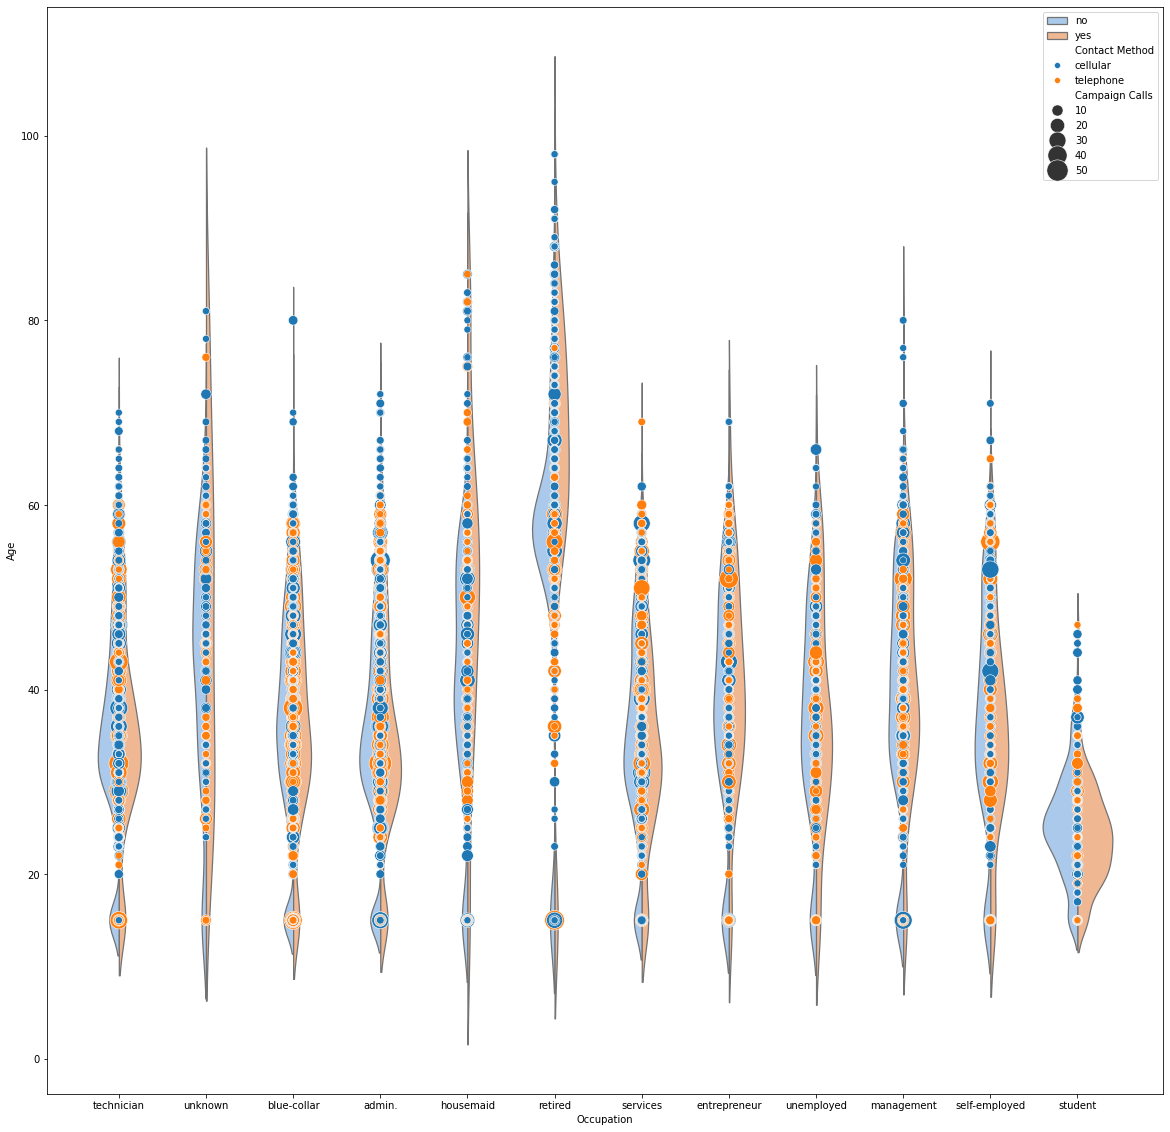

In [5]:

fig, ax = plt.subplots(figsize=(20,20))

sns.violinplot(data=dataframe, x= "Occupation", y="Age",split=True,hue="Subscription Status",palette="pastel",ax=ax,inner=None)
sns.scatterplot(data=dataframe, x= "Occupation", y="Age",hue= "Contact Method", size= "Campaign Calls",sizes=(50,500),ax=ax)

